## Value Iteration Algorithm

To gain a thorough understanding of the working of an agent that uses Markov Decision Processes (MDP) to implement a ride sharing application. The taxi agent should pick up passengers and drop them off at 3 designated fixed points (L1, L2 and L3) in a 5 ×5 grid. Each episode of the ride sharing application involves 2 passengers P1 and P2. Each passenger is picked up from one of the 3 locations and dropped off at one of the 2 remaining locations (it is meaningless to pick and drop off a passenger at the same location). The MDP is used to generate an optimal pick up and drop off schedule for any given pair of passengers. Figure 1 provides an example of the grid and the designated locations. 
The following three changes have been made to the project specification:
1. Positive rewards are +20000, with living reward of -1 and discount factor as
2. Negative reward for illegal pickup/drop off is -10000 <br><br>
For all points that are not designated as pickup or drop-off points 


1.   Pr(s’|(a,b), M)=0.8 where M is the intended move which can be one of N,S, W or E
2.   Pr(s’|(a,b), M)=0.04 where M is not in the intended direction
3. Pr((a,b)|(a,b), P)=0.04
4. Pr((a,b)|(a,b), D)=0.04



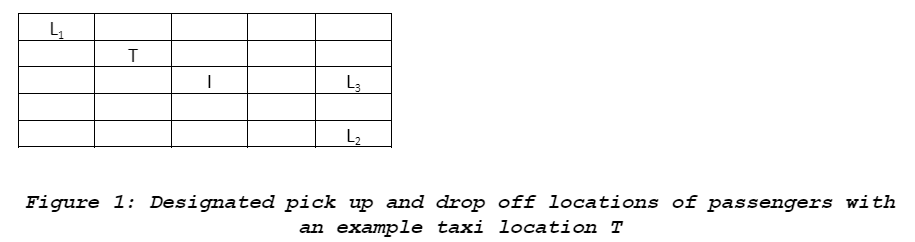

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pr=20000 # positive reward
nr=-10000 # negative reward
act=[[pr,0,0,0,0],[0,0,0,0,0],[0,0,nr,0,0],[0,0,0,0,0],[0,0,0,0,0]] # intial environment

In [ ]:
def cal(i,j):
  """
  parameters : grid rows and columns
  i = rows
  j = columns
  returns : North, South, East, West indexes
  
  """
  lt=[]
  for k in range(0,1):
    if j+1>4:
      lt.append((i,j))
      lt.append((i,j-1))
    elif j-1<=-1:
      lt.append((i,j+1))
      lt.append((i,j))
    else:
      lt.append((i,j+1))
      lt.append((i,j-1))

    if i+1>4:
      lt.append((i,j))
      lt.append((i-1,j))
    elif i-1<=-1:
      lt.append((i+1,j))
      lt.append((i,j))
    else:
      lt.append((i+1,j))
      lt.append((i-1,j))

  return lt  

In [ ]:
def print_environment(pl):
  """
  Parameter:
  pl =  nest list of directions
  """
  r=''
  for i1,i in enumerate(pl):
    r+='| '
    for j1,j in enumerate(i):
      if i1==2 and j1==2:
        r+='Construction' +' | '
      else:
        r+= str(j)+' | '
    print(r)
    r=''
  print()

In [ ]:
def print_heatmap(lt,s1):
    plt.figure()
    plt.title(s1)
    sns.heatmap(lt,annot=True,linewidth=.5,fmt=".1f")

In [ ]:
def pick_drop(act,p,d,l=(3,3)):
  """
  Parameters:
  act = environment
  p= pick up index
  d = drop index
  l= illegal pick/drop

  returns : the environment with pick up and drop locations
  """
  a=(0,0)
  b=(2,4)
  c=(4,4)
  if l==a:
    act[b[0]][b[1]]=20000
    act[c[0]][c[1]]=20000
    act[a[0]][a[1]]=-10000
  elif l==b:
    act[a[0]][a[1]]=20000
    act[c[0]][c[1]]=20000
    act[b[0]][b[1]]=-10000
  else:
    act[b[0]][b[1]]=20000
    act[a[0]][a[1]]=20000
    act[c[0]][c[1]]=-10000

  return act



In [ ]:
def mdp(act):
  """
  Parameters:
  Act = environment
  Returns : values and directions of Grid
  """
  l1,l2,l3,l4,l5=[],[],[],[],[] 
  d={}
  l6=["west", "east", "north", "south","pick","drop"] 
  cnt=0
  while (True): 
    l1,l4,pl=[],[],[]
    cnt+=1 # count for number of iterations
    for i in range(0,5): # for each row
      l2,l5=[],[]
      for j in range(0,5): # for each column
          if act[i][j]==20000 or act[i][j]==-10000 : # if the location is pick up or drop or under contruction
            l2.append(act[i][j])
            l5.append(act[i][j])
          else: # for all other points
            lt=cal(i,j)
            l3=[0.8*act[lt[0][0]][lt[0][1]]+0.04*act[lt[1][0]][lt[1][1]]+0.04*act[lt[2][0]][lt[2][1]]+0.04*act[lt[3][0]][lt[3][1]]+0.04*act[lt[0][0]][lt[0][1]]+0.04*act[lt[0][0]][lt[0][1]],
                          0.04*act[lt[0][0]][lt[0][1]]+0.8*act[lt[1][0]][lt[1][1]]+0.04*act[lt[2][0]][lt[2][1]]+0.04*act[lt[3][0]][lt[3][1]]+0.04*act[lt[0][0]][lt[0][1]]+0.04*act[lt[0][0]][lt[0][1]],
                          0.04*act[lt[0][0]][lt[0][1]]+0.04*act[lt[1][0]][lt[1][1]]+0.8*act[lt[2][0]][lt[2][1]]+0.04*act[lt[3][0]][lt[3][1]]+0.04*act[lt[0][0]][lt[0][1]]+0.04*act[lt[0][0]][lt[0][1]],
                            0.04*act[lt[0][0]][lt[0][1]]+0.04*act[lt[1][0]][lt[1][1]]+0.04*act[lt[2][0]][lt[2][1]]+0.8*act[lt[3][0]][lt[3][1]]+0.04*act[lt[0][0]][lt[0][1]]+0.04*act[lt[0][0]][lt[0][1]],
                            0.04*act[lt[0][0]][lt[0][1]]+0.04*act[lt[1][0]][lt[1][1]]+0.04*act[lt[2][0]][lt[2][1]]+0.04*act[lt[3][0]][lt[3][1]]+0.8*act[lt[0][0]][lt[0][1]]+0.04*act[lt[0][0]][lt[0][1]],
                              0.04*act[lt[0][0]][lt[0][1]]+0.04*act[lt[1][0]][lt[1][1]]+0.04*act[lt[2][0]][lt[2][1]]+0.04*act[lt[3][0]][lt[3][1]]+0.04*act[lt[0][0]][lt[0][1]]+0.8*act[lt[0][0]][lt[0][1]]]
            l2.append(-1+0.9*max(l3)) # calculating the Utility
            l5.append(l6[l3.index(max(l3))]) # getting the direction 
      l1.append(l2)
      l4.append(l5)
    act=l1
    pl=l4

    if cnt>=10: # breaking while loop after 10 iterations
      return act,pl


Grid Episode

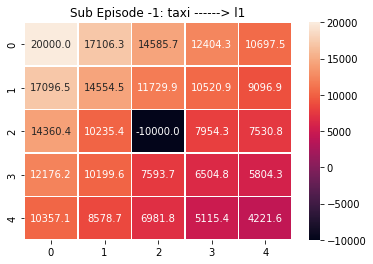

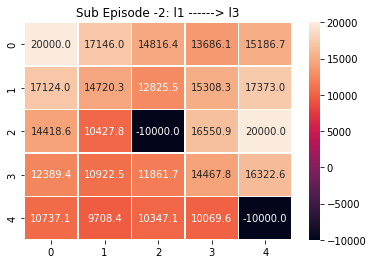

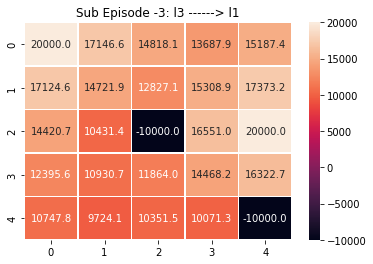

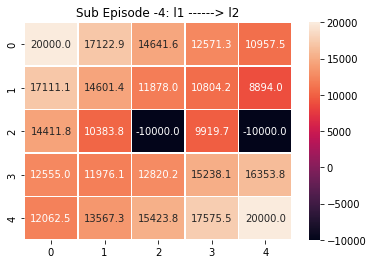

In [ ]:
"""
l1 ------> l3, l3 ------> l1, l1 ------> l2
"""
# sub episode -1: The taxi moving from its start location (2,4) to pick up P1 from (1,5)
act1,pl1=mdp(act)
print_heatmap(act1,"Sub Episode -1: taxi ------> l1")
# sub episode -2: The taxi moving from (1,5) to drop off P1 at (5,2)
act11=pick_drop(act1,(0,0),(2,4),(4,4))
act2,pl2=mdp(act11)
print_heatmap(act2,"Sub Episode -2: l1 ------> l3")
# sub episode -3: The taxi moving from (5,2) to pick up P2 from (5,1)
act22=pick_drop(act2,(2,4),(0,0),(4,4))
act3,pl3=mdp(act22)
print_heatmap(act3,"Sub Episode -3: l3 ------> l1")
# sub episode -4: The taxi moving from (5,1) to drop off P2 at (1,5)
act33=pick_drop(act3,(0,0),(4,4),(2,4))
act4,pl4=mdp(act33)
print_heatmap(act4,"Sub Episode -4: l1 ------> l2")

In [ ]:
act4

[[20000,
  17122.875276874012,
  14641.561993443163,
  12571.250994432798,
  10957.451991345179],
 [17111.136697974056,
  14601.374033354996,
  11878.038246603774,
  10804.21873378119,
  8893.984927550338],
 [14411.790944796823, 10383.84016967254, -10000, 9919.709858701684, -10000],
 [12555.03180293632,
  11976.099739127145,
  12820.185535853963,
  15238.09306268161,
  16353.756782424292],
 [12062.480263263144,
  13567.323077211382,
  15423.770890693739,
  17575.499704247883,
  20000]]

In [ ]:
pl4

[[20000, 'east', 'east', 'east', 'east'],
 ['south', 'south', 'south', 'south', 'south'],
 ['south', 'south', -10000, 'north', -10000],
 ['south', 'north', 'north', 'north', 'north'],
 ['west', 'west', 'west', 'west', 20000]]

In [ ]:
# printing environment
print_environment(pl1)
print_environment(pl2)
print_environment(pl3)
print_environment(pl4)

| 20000 | east | east | east | east | 
| south | south | south | south | south | 
| south | south | Construction | south | south | 
| south | east | east | south | south | 
| south | east | east | east | south | 

| 20000 | east | east | north | north | 
| south | south | west | west | north | 
| south | south | Construction | west | 20000 | 
| south | east | west | south | south | 
| south | south | south | south | -10000 | 

| 20000 | east | east | north | north | 
| south | south | west | pick | north | 
| south | south | Construction | west | 20000 | 
| south | east | west | south | south | 
| south | south | south | south | -10000 | 

| 20000 | east | east | east | east | 
| south | south | south | south | south | 
| south | south | Construction | north | -10000 | 
| south | north | north | north | north | 
| west | west | west | west | 20000 | 



Episode -1

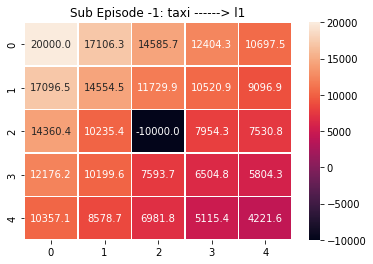

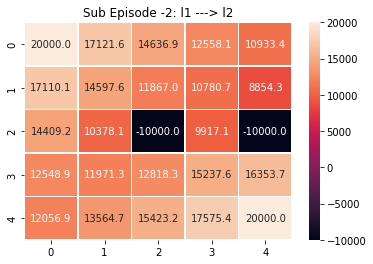

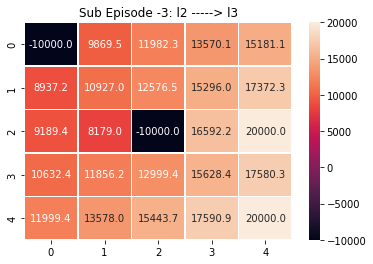

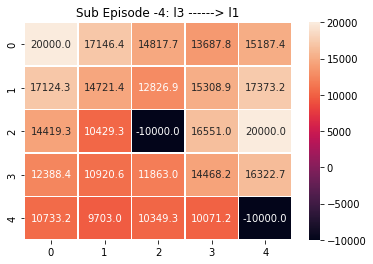

In [ ]:
"""
l1 ---> l2, l2 -----> l3, l3 ------> l1
"""
act=[[pr,0,0,0,0],[0,0,0,0,0],[0,0,nr,0,0],[0,0,0,0,0],[0,0,0,0,0]]
# sub episode -1: The taxi moving from its start location (1,1) to pick up P1 from (0,0)
act1,pl1=mdp(act)
print_heatmap(act1,"Sub Episode -1: taxi ------> l1")
# sub episode -2: The taxi moving from (0,0) to drop off P1 at (4,4)
act11=pick_drop(act1,(0,0),(4,4),(2,4))
act2,pl2=mdp(act11)
print_heatmap(act2,"Sub Episode -2: l1 ---> l2")
# sub episode -3: The taxi moving from (4,4) to drop off P1 at (2,4)
act22=pick_drop(act2,(4,4),(2,4),(0,0))
act3,pl3=mdp(act22)
print_heatmap(act3,"Sub Episode -3: l2 -----> l3")
# sub episode -4: The taxi moving from (2,4) to drop off P1 at (0,0)
act33=pick_drop(act3,(2,4),(0,0),(4,4))
act4,pl4=mdp(act33)
print_heatmap(act4,"Sub Episode -4: l3 ------> l1")

In [ ]:
print_environment(pl1)
print_environment(pl2)
print_environment(pl3)
print_environment(pl4)

| 20000 | east | east | east | east | 
| south | south | south | south | south | 
| south | south | Construction | south | south | 
| south | east | east | south | south | 
| south | east | east | east | south | 

| 20000 | east | east | east | east | 
| south | south | south | south | south | 
| south | south | Construction | north | -10000 | 
| south | north | north | north | north | 
| west | drop | west | west | 20000 | 

| -10000 | west | west | north | north | 
| pick | west | drop | west | north | 
| north | north | Construction | west | 20000 | 
| north | north | west | north | north | 
| west | west | west | pick | 20000 | 

| 20000 | east | east | north | north | 
| south | south | west | west | north | 
| south | south | Construction | west | 20000 | 
| south | east | west | south | south | 
| south | south | south | south | -10000 | 



Episode-2 

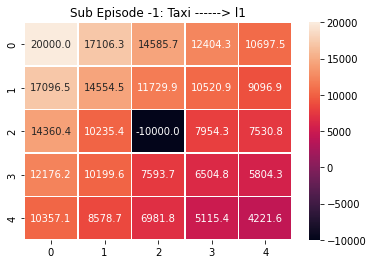

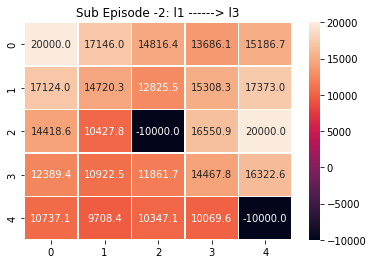

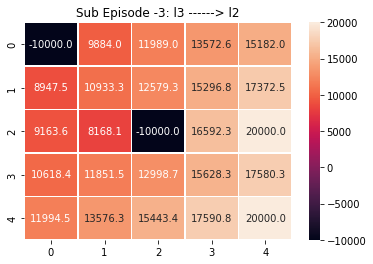

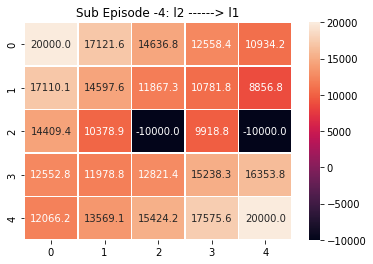

In [ ]:
"""
l1 ------> l3, l3 ------> l2, l2 ------> l1
"""
act=[[pr,0,0,0,0],[0,0,0,0,0],[0,0,nr,0,0],[0,0,0,0,0],[0,0,0,0,0]]
# sub episode -1: The taxi moving from its start location (1,1) to pick up P1 from (0,0)
act1,pl1=mdp(act)
print_heatmap(act1,"Sub Episode -1: Taxi ------> l1")
# sub episode -2: The taxi moving from (0,0) to drop off P1 at (2,4)
act=pick_drop(act1,(0,0),(2,4),(4,4))
act2,pl2=mdp(act)

print_heatmap(act2,"Sub Episode -2: l1 ------> l3")
# sub episode -3: The taxi moving from (2,4) to drop off P1 at (4,4)
act=pick_drop(act2,(2,4),(4,4),(0,0))
act3,pl3=mdp(act)

print_heatmap(act3,"Sub Episode -3: l3 ------> l2")
# sub episode -4: The taxi moving from (4,4) to drop off P1 at (0,0)
act=pick_drop(act3,(4,4),(0,0),(2,4))
act4,pl4=mdp(act)

print_heatmap(act4,"Sub Episode -4: l2 ------> l1")

In [ ]:
print_environment(pl1)
print_environment(pl2)
print_environment(pl3)
print_environment(pl4)

| 20000 | east | east | east | east | 
| south | south | south | south | south | 
| south | south | Construction | south | south | 
| south | east | east | south | south | 
| south | east | east | east | south | 

| 20000 | east | east | north | north | 
| south | south | west | west | north | 
| south | south | Construction | west | 20000 | 
| south | east | west | south | south | 
| south | south | south | south | -10000 | 

| -10000 | west | west | north | north | 
| west | west | west | west | north | 
| north | north | Construction | west | 20000 | 
| north | north | west | north | south | 
| west | west | pick | pick | 20000 | 

| 20000 | east | east | east | east | 
| south | south | south | south | south | 
| south | south | Construction | north | -10000 | 
| south | north | north | north | north | 
| drop | pick | west | west | 20000 | 



Episode - 3

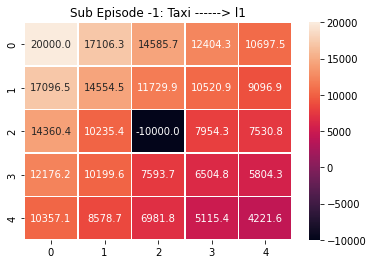

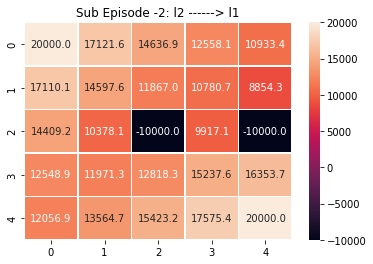

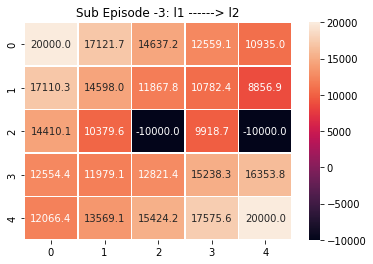

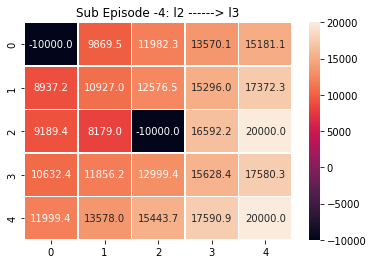

In [ ]:
"""
l2 ------> l1, l1 ------> l2, l2 ------> l3
"""
act=[[pr,0,0,0,0],[0,0,0,0,0],[0,0,nr,0,0],[0,0,0,0,0],[0,0,0,0,0]]
# sub episode -1: The taxi moving from its start location (1,1) to pick up P1 from (0,0)
act1,pl1=mdp(act)
print_heatmap(act1,"Sub Episode -1: Taxi ------> l1")

# sub episode -2: The taxi moving from (4,4) to drop off P1 at (0,0)
act=pick_drop(act1,(4, 4), (0, 0), (2, 4))
act2,pl2=mdp(act)
print_heatmap(act2,"Sub Episode -2: l2 ------> l1")

# sub episode -3: The taxi moving from (0,0) to drop off P1 at (4,4)
act=pick_drop(act2,(0,0),(4,4),(2,4))
act3,pl3=mdp(act)
print_heatmap(act3,"Sub Episode -3: l1 ------> l2")

# sub episode -4: The taxi moving from (4,4) to drop off P1 at (2,4)
act=pick_drop(act3,(4,4),(2,4),(0,0))
act4,pl4=mdp(act)
print_heatmap(act4,"Sub Episode -4: l2 ------> l3")

In [ ]:
print_environment(pl1)
print_environment(pl2)
print_environment(pl3)
print_environment(pl4)

| 20000 | east | east | east | east | 
| south | south | south | south | south | 
| south | south | Construction | south | south | 
| south | east | east | south | south | 
| south | east | east | east | south | 

| 20000 | east | east | east | east | 
| south | south | south | south | south | 
| south | south | Construction | north | -10000 | 
| south | north | north | north | north | 
| west | drop | west | west | 20000 | 

| 20000 | east | east | east | east | 
| south | south | south | south | south | 
| south | south | Construction | north | -10000 | 
| south | north | north | north | north | 
| pick | west | west | west | 20000 | 

| -10000 | west | west | north | north | 
| west | west | west | pick | north | 
| north | north | Construction | west | 20000 | 
| north | north | drop | north | north | 
| drop | west | west | pick | 20000 | 



Episode 4

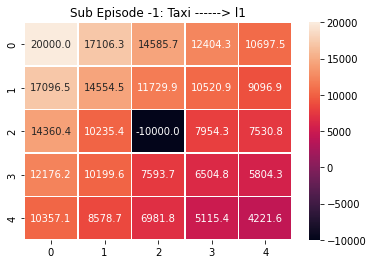

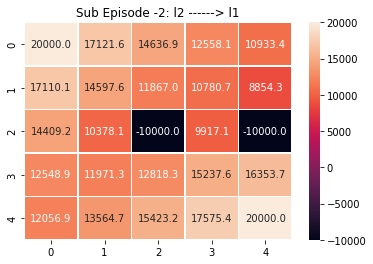

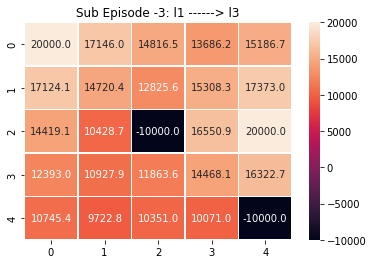

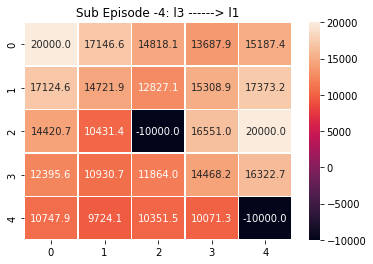

In [ ]:
"""
l3 ------> l1, l1 ------> l3, l3------> l1
"""
act=[[pr,0,0,0,0],[0,0,0,0,0],[0,0,nr,0,0],[0,0,0,0,0],[0,0,0,0,0]]
# sub episode -1: The taxi moving from its start location (1,1) to pick up P1 from (0,0)
act1,pl1=mdp(act)
print_heatmap(act1,"Sub Episode -1: Taxi ------> l1")

# sub episode -2: The taxi moving from (4,4) to drop off P1 at (0,0)
act11=pick_drop(act1,(4, 4), (0, 0), (2, 4))
act2,pl2=mdp(act11)
print_heatmap(act2,"Sub Episode -2: l2 ------> l1")

# sub episode -3: The taxi moving from (0,0) to drop off P1 at (2,4)
act22=pick_drop(act2,(0,0),(2,4),(4,4))
act3,pl3=mdp(act22)
print_heatmap(act3,"Sub Episode -3: l1 ------> l3")

# sub episode -4: The taxi moving from (2,4) to drop off P1 at (0,0)
act33=pick_drop(act3,(2,4),(0,0),(4,4))
act4,pl4=mdp(act33)
print_heatmap(act4,"Sub Episode -4: l3 ------> l1")

In [ ]:
print_environment(pl1)
print_environment(pl2)
print_environment(pl3)
print_environment(pl4)

| 20000 | east | east | east | east | 
| south | south | south | south | south | 
| south | south | Construction | south | south | 
| south | east | east | south | south | 
| south | east | east | east | south | 

| 20000 | east | east | east | east | 
| south | south | south | south | south | 
| south | south | Construction | north | -10000 | 
| south | north | north | north | north | 
| west | drop | west | west | 20000 | 

| 20000 | east | east | north | north | 
| south | south | drop | west | north | 
| south | south | Construction | west | 20000 | 
| south | east | west | south | south | 
| south | south | south | south | -10000 | 

| 20000 | east | east | north | north | 
| south | south | west | pick | north | 
| south | south | Construction | west | 20000 | 
| south | east | west | south | south | 
| south | south | south | south | -10000 | 

